Import Statements

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import math

## Rejection Method

#### Uniform Sampling

In [39]:
betaDist = beta(5,3) #creating beta distribution with alpha = 5, beta = 3
xMax = 2 / 3 #calculated by (alpha - 1) / (alpha + beta - 2)
betaMax = betaDist.pdf(xMax) #calculating maximum of beta distribution

i = 0 #index
accepted = np.zeros(1000) #accepted events
count = 0 #keeps track of total iterations

while i < 1000:
    x = np.random.uniform(0,1,1) #creating uniform distribution for x
    y = np.random.uniform(0,betaMax,1) #creating uniform distribution for y
    if beta.pdf(x,5,3) < y:
        accepted[i] = x #adding x to our accepted values if the corresponding y is greater than the weight
        i += 1 #increasing our index inside if statement to ensure we get 1000 events
    count += 1

print('The total number of samplings required is',count)

C:\Users\caitl\AppData\Local\Temp\ipykernel_47944\549505270.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accepted[i] = x #adding x to our accepted values if the corresponding y is greater than the weight


The total number of samplings required is 1796


$w(x)=\frac{f(x)}{g(x)}$ where $f(x)=beta(\alpha =5,\beta =3)$, and $g(x)=unif(0,1)$

Thus, $w(x)=beta(5,3)$

#### Gaussian Sampling

In [46]:
i = 0 #index
accepted2 = np.zeros(1000) #accepted events
count2 = 0 #keeps track of total iterations

while i < 1000:
    x = np.random.normal(xMax,0.2,1) #creating gaussian distribution for x
    y = np.random.uniform(0,betaMax,1) #creating uniform distribution for y
    if beta.pdf(x,5,3) < y:
        accepted2[i] = x #adding x to our accepted values if the corresponding y is greater than the weight
        i += 1 #increasing our index inside if statement to ensure we get 1000 events
    count2 += 1

print('The total number of samplings required is',count2)

C:\Users\caitl\AppData\Local\Temp\ipykernel_47944\2896896219.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accepted2[i] = x #adding x to our accepted values if the corresponding y is greater than the weight


The total number of samplings required is 2983


I chose $\mu=beta_{max}$ and $\sigma = 0.2$ because we want the normal distribution to fit the beta distribution as closely as possible.

$w(x)=beta(5,3)$

The total number of samples for Gaussian sampling is much higher than for uniform sampling.

#### Visualization

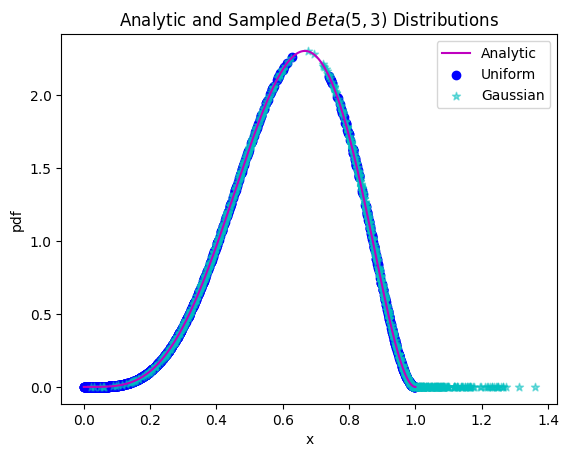

In [50]:
x = np.linspace(0,1,1000) #generating x values for analytic distribution
plt.plot(x,betaDist.pdf(x),color = 'm')
plt.scatter(accepted,betaDist.pdf(accepted),color = 'b',alpha = 1)
plt.scatter(accepted2,betaDist.pdf(accepted2),color = 'c',alpha = 0.5,marker = '*')
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Analytic and Sampled $Beta(5,3)$ Distributions')
plt.legend(['Analytic','Uniform','Gaussian'])
plt.show()

## Sphere in 3D

#### Uniform Density

In [16]:
def sphere(n):
    coord = np.zeros((n,3)) #array for 3D coordinates
    coord[:,0] = np.random.uniform(-1,1,n) #generating x coordinates
    coord[:,1] = np.random.uniform(-1,1,n) #generating y coordinates
    coord[:,2] = np.random.uniform(-1,1,n) #generating z coordinates

    inSphere = [] #creating index function
    radii = np.zeros(n) #list of radii^2
    for i in range(n):
        rSquared = coord[i,0] ** 2 + coord[i,1] ** 2 + coord[i,2] ** 2 #calculating radius^2 as x^2 + y^2 + z^2
        radii[i] = rSquared #adding r^2 to list
        if rSquared < 1:
            inSphere.append(1) #assigning 1 to radii smaller than 1
        else:
            inSphere.append(0) #assigning 0 to radii larger than 1
    
    mass = 16 * np.count_nonzero(inSphere) / n #calculating mass based on the mass of the cube = 2^3 * rho_0
    uncertainty = 16 * np.std(radii) / np.sqrt(n) #calculating the uncertainty as mass * standard deviation of r^2 / sqrt(n)

    return mass,uncertainty

In [26]:
m1,u1 = sphere(100) #calculating mass of sphere with N=100
print('The mass of the sphere with uniform density is',m1,'with uncertainty',u1)

The mass of the sphere with uniform density is 8.64 with uncertainty 0.8365286417329738


[]

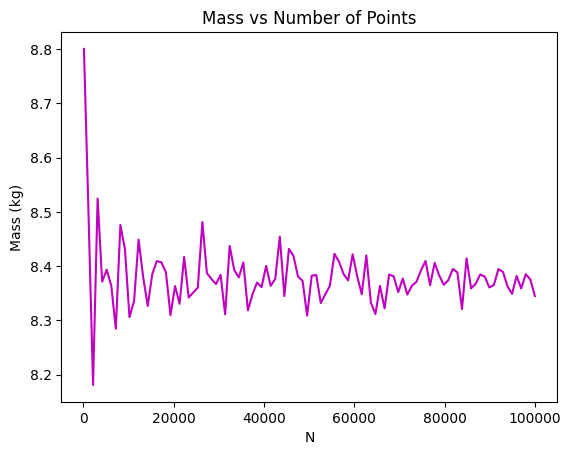

In [23]:
spheres = np.linspace(100,100000,100,dtype = int) #N goes from 100 to 100K with 100 steps
m2 = np.zeros(100) #creating array of sphere masses
u2 = np.zeros(100) #creating array of mass uncertainties

for i in range(100):
    m2[i],u2[i] = sphere(spheres[i]) #calculating masses and uncertainties for spheres

plt.plot(spheres,m2,color = 'm')
plt.xlabel('N')
plt.ylabel('Mass (kg)')
plt.title('Mass vs Number of Points')
plt.plot()

[]

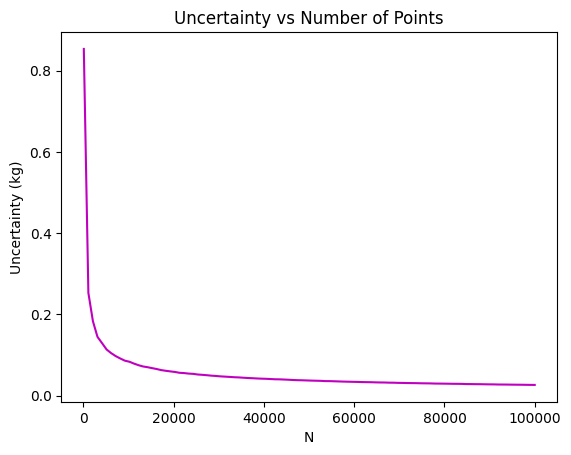

In [24]:
plt.plot(spheres,u2,color = 'm')
plt.xlabel('N')
plt.ylabel('Uncertainty (kg)')
plt.title('Uncertainty vs Number of Points')
plt.plot()

The simulated mass appears to converge with the theoretical mass as N becomes larger, as the values are closer to $\frac{8}{3}\pi$, and uncertainty decreases.

#### Linear Density

In [47]:
def sphereLinear(n):
    coord = np.zeros((n,3)) #array for 3D coordinates
    coord[:,0] = np.random.uniform(-1,1,n) #generating x coordinates
    coord[:,1] = np.random.uniform(-1,1,n) #generating y coordinates
    coord[:,2] = np.random.uniform(-1,1,n) #generating z coordinates

    inSphere = [] #creating index function
    radii = np.zeros(n) #list of radii^2
    for i in range(n):
        rSquared = coord[i,0] ** 2 + coord[i,1] ** 2 + coord[i,2] ** 2 #calculating radius^2 as x^2 + y^2 + z^2
        radii[i] = rSquared #adding r^2 to list
        if rSquared < 1:
            inSphere.append(1) #assigning 1 to radii smaller than 1
        else:
            inSphere.append(0) #assigning 0 to radii larger than 1
    
    mass = 0
    for i in range(n):
        if inSphere[i] == 1:
            mass += 2 * np.sqrt(radii[i]) #adding density to mass as rho_0 * radius if inside the sphere
    mass = 8 * mass / n #calculating mass based on mass of the cube 2^3
    
    return mass

In [72]:
m3 = sphereLinear(100) #calculating mass of sphere with N=100
print('The mass of the sphere with linear density is',m3)

The mass of the sphere with linear density is 6.205762002071096
